# Linear Strength Source, Doublet and Vortex Panel Method

### By Dongyu Liang

## 1. Abstract

In this project, I will use linear strength source, doublet and vortex panel method instead of constant strength panel method to calculate surface pressure coefficient around NACA0012 airfoil when attack angle is 0° and 4° comparing with the theoretical solution from NASA web and the pressure coefficient we get from the lesson 10 and lesson 11 in the class. The result from this project, I hope, can be better than using constant strength in accuracy check and getting more close to the theoretical solution. To push me a little forward, I will introduce the doublet panel method that we did not use during the class into this project, moreover, I will use more than just one panels number to compare with each other, theoretically, more panels I introduced, more accuarcy would be improved. At the end of each strength, I also will plot the velocity field to see what is different.

## 2. Introduction

The reason I want to introduce the linear strength source, doublet and vortex panel method instead of constant strength panel method, it is because the singularity distribution around an arbitrary geometry at the panel edges is a continuous problem, but we are using a series of constant strength in order to simplify the procedure in this continuous issue, that would result in a discontinuity of the singularity strength, if we want to cover this problem, the linear method is our better choice.

### 2.1 Constant strength source, doublet and vortex concept

### 2.1.1 Constant strength source

In the lesson10, we have learned how to use panel method to calculate the pressure coefficient around an arbitrary geometry, such as NACA0012 airfoil without concerning the influence from the vortex. However, under the condition gave from lesson 10, one thing should be noticed, as same as the condition gave from lesson 11 when we introduce the strength of vortex into the system. That is the strength of source in lesson 10 are assumed to be constant on each panel, same as the strength of vortex in lesson 11. 

If we consider selecting one constant strength source panel along the x axis up from the whole system in an arbitrary geometry, one source distribution condition should be like the picture shown below, and it is a source sheet we learned before.

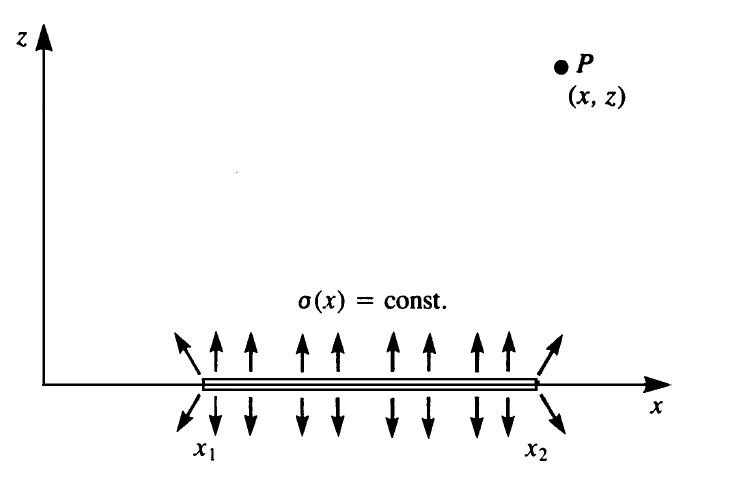

In [1]:
from IPython.core.display import Image 
Image(filename='3.png')

                     The picture is cited from Joseph Katz, Page 233

So, apparently, a constant strength source means the source strength per length is constant, and in math expression is σ(x) = σ = const. The influence of this distribution at a point P is an integral of the influences of the point elements along the segment x1 → x2, as showing in the picture above.
And the equations become what we have learned in the previous lesson as below:

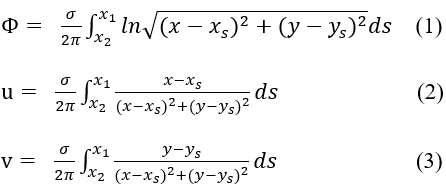

In [2]:
Image(filename='6.png')

           The picture is made by Microsoft Word

### 2.1.2 Constant strength vortex

For the linear strength vortex panel method, it has a similar idea as the linear strength source panel method in the book. But first, let us refresh our memory, in the previous lesson 11, we have learned the equations are shown below when we consider it is along segment x1 → x2(also shown below):

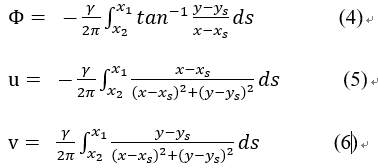

In [3]:
Image(filename='10.png')

           The picture is made by Microsoft Word

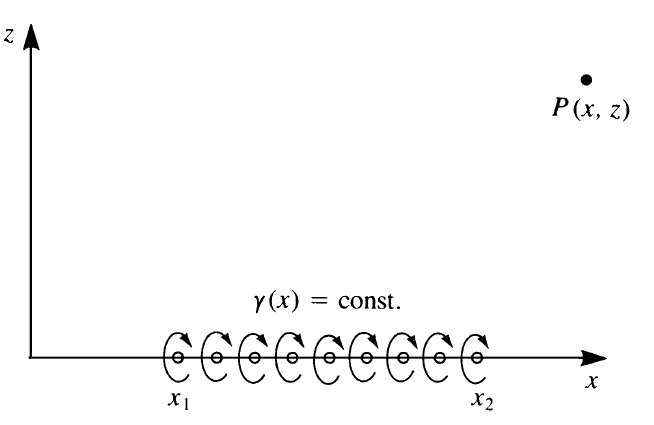

In [4]:
Image(filename='9.png')

                     The picture is cited from Joseph Katz, Page 236

### 2.1.3 Constant strength doublet

In the lesson 3, we learned how to use doublet and get some equations:

$$\psi\left(x,y\right) = -\frac{\kappa}{2\pi}\frac{y}{x^2+y^2}$$

$$u\left(x,y\right) = -\frac{\partial\psi}{\partial x} = -\frac{\kappa}{2\pi}\frac{2xy}{\left(x^2+y^2\right)^2}$$

$$v\left(x,y\right) = \frac{\partial\psi}{\partial y} = -\frac{\kappa}{2\pi}\frac{x^2-y^2}{\left(x^2+y^2\right)^2}$$

However, we dont know what will happen if we use it into practical problem, such as airfoil panel method. And also we need to calcualte integration of all panels around the airfoil. According to the book, which lead us to the equastions below:

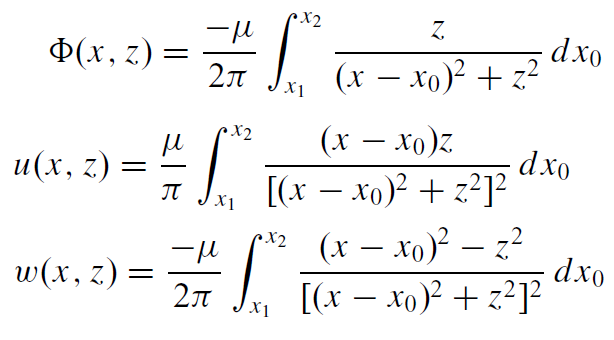

In [5]:
Image(filename='13.png')

                     The picture is cited from Joseph Katz, Page 252

Where μ is κ, and z is y, x0 is xs, w is v. Now we can convert this equation into the equation what we are familiar with and get a result based on constant strength doublet.

And for the whole constant strength panels, the picture of one selected panel with left side panel and right side panel would be like this:

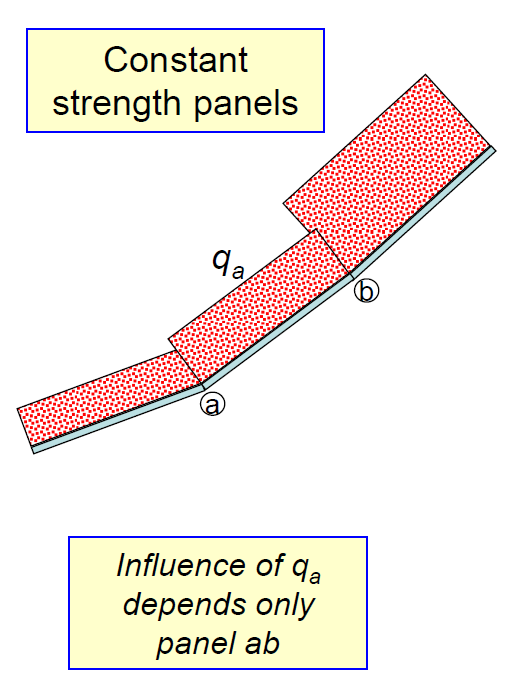

In [6]:
Image(filename='1.png')

     The picture is cited from an unknown ppt

### 2.2 Linear strength concept

The linear strength panel method, obviously, it is considering the strength on each panels are not individually, they have a linear relation to the neighbor panels, the picture of one selected panel with left side panel and right side panel would be like this:

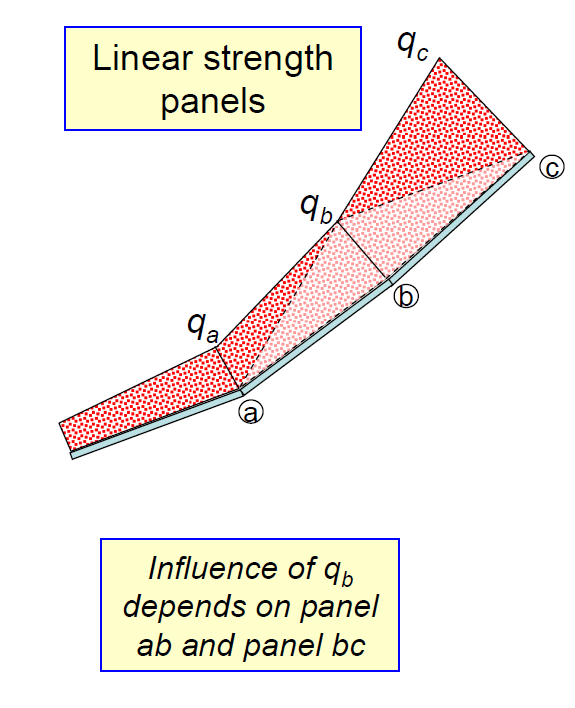

In [7]:
Image(filename='2.png')

         The picture is cited from an unknown ppt

And of course, the equations are becoming different and will be discussed in next part.

## 3. Methodology

### 3.1 linear strength source methodology

The methodology of linear strength source panel method in this project is based on the achievement made by Joseph Katz and Allen Plotkin in the book named “Low-speed Aerodynamic 2nd Edition”, published in 2001.

In this book, they mentioned that “The requirement that the strength of the singularity remains the same at the edge of two neighbor elements results in an additional equation.” In page 237. It indicated that a linear source distribution along the x axis has an mathematic expression as        σ(x) = σ0 + σ1(x − x1) (shown in the picture below), based on the principle of superposition, this can be divided into a constant strength element which is σ0 and a linearly varying strength element which is σ1(x − x1). Therefore, for the case we solved in lesson 10, in order to make it become a linear strength source panel method, we need to add an additional part to the results of the constant strength source.


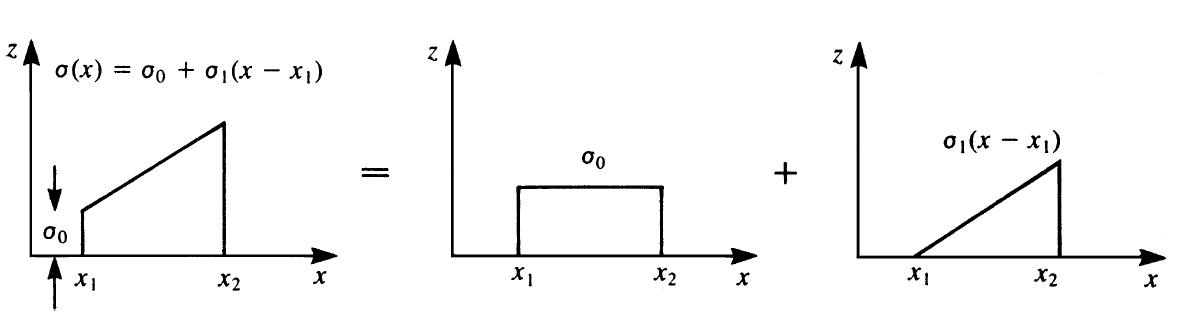

In [8]:
Image(filename='4.png')

                                   The picture is cited from Joseph Katz, Page 238

Joseph Katz had pointed out that “The influence of the simplified linear distribution source element, where σ(x) = σ1(x − x1), at a point P is obtained by integrating the influences of the point elements between x1 and x2” and got the linear strength part equations as below：

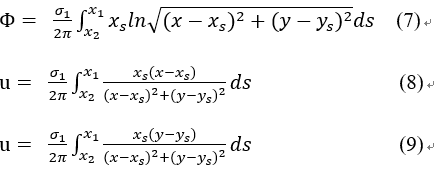

In [9]:
Image(filename='7.png')

           The picture is made by Microsoft Word based on Joseph Katz, Page 238

### 3.2 linear strength vortex methodology

Because of the similar principle, Joseph Katz also divided vortex strength into two parts, constant strength vortex γ0 and linear strength vortex γ1(x − x1), thus, the strength of the vortex distribution varies linearly along the element becomes γ(x) = γ0 + γ1(x − x1), and the equations which we are familiar with are becoming these：

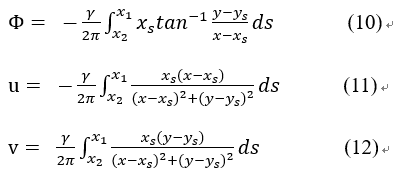

In [10]:
Image(filename='11.png')

           The picture is made by Microsoft Word based on Joseph Katz, Page 241

### 3.3 linear strength doublet methodology

Same as before, consider a doublet distribution along the x axis with a strength κ(x) = κ0 + κ1(x − x1):

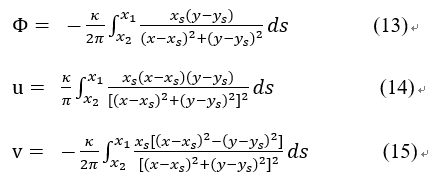

In [11]:
Image(filename='14.png')

           The picture is made by Microsoft Word based on Joseph Katz, Page 240

Now, the basic principle is clear, the next step is to combine the constant part and the linear part into one part in the future coding. then I will figure out how to use these into what we have learned in the class

### 4. Code simulation

### 4.1 Linear strength source simulation

First, introducing all the our favorite libraries and the integrate module from SciPy

In [12]:
import os
import math
import numpy
from matplotlib import pyplot
from scipy import integrate
# display the figures in the Notebook
%matplotlib inline

Then, I start with importing the NACA0012 geometry from a data file, but not plot the airfoil, skip to discretization instead

In [13]:
# read of the geometry from a data file
naca_filepath = os.path.join('naca0012.dat')
with open (naca_filepath, 'r') as file_name:
    xx=numpy.loadtxt(file_name)
    x=xx[0:131,0]
    y=xx[0:131,1]

### Discretization into panels

In [14]:
class Panel:

    def __init__(self, xa, ya, xb, yb):

        self.xa, self.ya = xa, ya
        self.xb, self.yb = xb, yb
        
        self.xc, self.yc = (xa+xb)/2, (ya+yb)/2       # control-point (center-point)
        self.length = math.sqrt((xb-xa)**2+(yb-ya)**2)     # length of the panel
        
        # orientation of the panel (angle between x-axis and panel's normal)
        if xb-xa <= 0.:
            self.beta = math.acos((yb-ya)/self.length)
        elif xb-xa > 0.:
            self.beta = math.pi + math.acos(-(yb-ya)/self.length)
        
        # location of the panel
        if self.beta <= math.pi:
            self.loc = 'upper'
        else:
            self.loc = 'lower'
        
        self.sigma = 0.                             # source strength
        self.vt = 0.                                # tangential velocity
        self.cp = 0.                                # pressure coefficient

In [15]:
def define_panels(x, y, N=40):

    R = (x.max()-x.min())/2                                    # radius of the circle
    x_center = (x.max()+x.min())/2                             # x-coord of the center
    x_circle = x_center + R*numpy.cos(numpy.linspace(0, 2*math.pi, N+1))  # x-coord of the circle points
    
    x_ends = numpy.copy(x_circle)      # projection of the x-coord on the surface
    y_ends = numpy.empty_like(x_ends)  # initialization of the y-coord Numpy array

    x, y = numpy.append(x, x[0]), numpy.append(y, y[0])    # extend arrays using numpy.append
    
    # computes the y-coordinate of end-points
    I = 0
    for i in range(N):
        while I < len(x)-1:
            if (x[I] <= x_ends[i] <= x[I+1]) or (x[I+1] <= x_ends[i] <= x[I]):
                break
            else:
                I += 1
        a = (y[I+1]-y[I])/(x[I+1]-x[I])
        b = y[I+1] - a*x[I+1]
        y_ends[i] = a*x_ends[i] + b
    y_ends[N] = y_ends[0]
    
    panels = numpy.empty(N, dtype=object)
    for i in range(N):
        panels[i] = Panel(x_ends[i], y_ends[i], x_ends[i+1], y_ends[i+1])
    
    return panels

Start with panels number N = 100

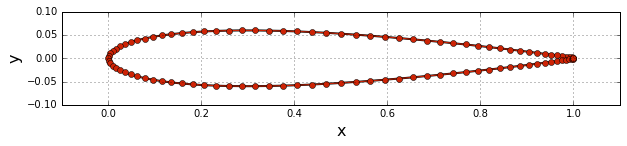

In [16]:
N = 100                            # number of panels
panels = define_panels(x, y, N)   # discretizes of the geometry into panels

# plot the geometry and the panels
width = 10
pyplot.figure(figsize=(width, width))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x, y, color='k', linestyle='-', linewidth=2)
pyplot.plot(numpy.append([panel.xa for panel in panels], panels[0].xa),
            numpy.append([panel.ya for panel in panels], panels[0].ya),
            linestyle='-', linewidth=1, marker='o', markersize=6, color='#CD2305')
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(-0.1, 1.1)
pyplot.ylim(-0.1, 0.1);

### Divide the strength into constant part and linear part

During the lesson 10, we already know that the last integral part of the boundary equation is:

$$\frac{\left(x_{c_i}-x_j\right)\frac{\partial y_{c_i}}{\partial n_i} + \left(y_{c_i}-y_j\right)\frac{\partial x_{c_i}}{\partial n_i}}{\left(x_{c_i}-x_j\right)^2 + \left(y_{c_i}-y_j\right)^2}$$

where $\frac{\partial x_{c_i}}{\partial n_i} = \cos \beta_i$ and $\frac{\partial y_{c_i}}{\partial n_i} = \sin \beta_i$.

And we know that 
$$x_j(s_j) = x_{a_j} - \sin\left(\beta_j\right) s_j$$

Next thing we need to do is to divide this equation into two parts as below based on the equations I found on the book.


In [17]:
def integral(x, y, panel, dxdz, dydz):
    # The constant strength source integral part is ((x - (panel.xa - math.sin(panel.beta)*s))*dxdz
    #                                               +(y - (panel.ya + math.cos(panel.beta)*s))*dydz)
    #                                              / ((x - (panel.xa - math.sin(panel.beta)*s))**2
    #                                                  +(y - (panel.ya + math.cos(panel.beta)*s))**2) 
    #
    # The linear strength source integral part is  s*((x - (panel.xa - math.sin(panel.beta)*s))*dxdz
    #                                               +(y - (panel.ya + math.cos(panel.beta)*s))*dydz)
    #                                              / ((x - (panel.xa - math.sin(panel.beta)*s))**2
    #                                                  +(y - (panel.ya + math.cos(panel.beta)*s))**2) 
    #
    # According to the theory indicated by Joseph Katz, I merge these two parts into one equation
    def integrand(s):
        return ((s+1)*((x - (panel.xa - math.sin(panel.beta)*s))*dxdz
                  +(y - (panel.ya + math.cos(panel.beta)*s))*dydz)
                / ((x - (panel.xa - math.sin(panel.beta)*s))**2
                   +(y - (panel.ya + math.cos(panel.beta)*s))**2) )
    return integrate.quad(integrand, 0.0, panel.length)[0]

### Define all the stuff

In [18]:
class Freestream:

    def __init__(self, u_inf=1.0, alpha=0.0):

        self.u_inf = u_inf
        self.alpha = alpha*math.pi/180          # degrees --> radians

In [19]:
# define and creates the object freestream
u_inf = 1.0                                # freestream spee
alpha = 0.0                                # angle of attack (in degrees)
freestream = Freestream(u_inf, alpha)      # instantiation of the object freestream

In [20]:
def build_matrix(panels):

    N = len(panels)
    A = numpy.empty((N, N), dtype=float)
    numpy.fill_diagonal(A, 0.5)
    
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A[i,j] = 0.5/math.pi*integral(p_i.xc, p_i.yc, p_j, math.cos(p_i.beta), math.sin(p_i.beta))
    
    return A

def build_rhs(panels, freestream):
 
    b = numpy.empty(len(panels), dtype=float)
    
    for i, panel in enumerate(panels):
        b[i] = -freestream.u_inf * math.cos(freestream.alpha - panel.beta)
    
    return b

In [21]:
A = build_matrix(panels)                    # compute the singularity matrix
b = build_rhs(panels, freestream)           # compute the freestream RHS

In [22]:
# solve the linear system
sigma = numpy.linalg.solve(A, b)

for i, panel in enumerate(panels):
    panel.sigma = sigma[i]

In [23]:
def get_tangential_velocity(panels, freestream):
    N = len(panels)
    A = numpy.empty((N, N), dtype=float)
    numpy.fill_diagonal(A, 0.0)
    
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A[i,j] = 0.5/math.pi*integral(p_i.xc, p_i.yc, p_j, -math.sin(p_i.beta), math.cos(p_i.beta))
    
    b = freestream.u_inf * numpy.sin([freestream.alpha - panel.beta for panel in panels])
    
    sigma = numpy.array([panel.sigma for panel in panels])
    
    vt = numpy.dot(A, sigma)+ b
    
    for i, panel in enumerate(panels):
        panel.vt = vt[i]

In [24]:
# compute the tangential velocity at the center-point of each panel
get_tangential_velocity(panels, freestream)

In [25]:
def get_pressure_coefficient(panels, freestream):

    for panel in panels:
        panel.cp = 1.0 - (panel.vt/freestream.u_inf)**2

In [26]:
# computes the surface pressure coefficients
get_pressure_coefficient(panels, freestream)

Introducing the theoretical data

In [27]:
voverVsquared=numpy.array([0, 0.64, 1.01, 1.241, 1.378, 1.402, 1.411, 1.411, 1.399, 1.378, 1.35, 1.288, 1.228, 1.166, 1.109, 1.044, 0.956, 0.906, 0])

In [28]:
xtheo=numpy.array([0, 0.5, 1.25, 2.5, 5.0, 7.5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 95, 100])
xtheo = xtheo/100

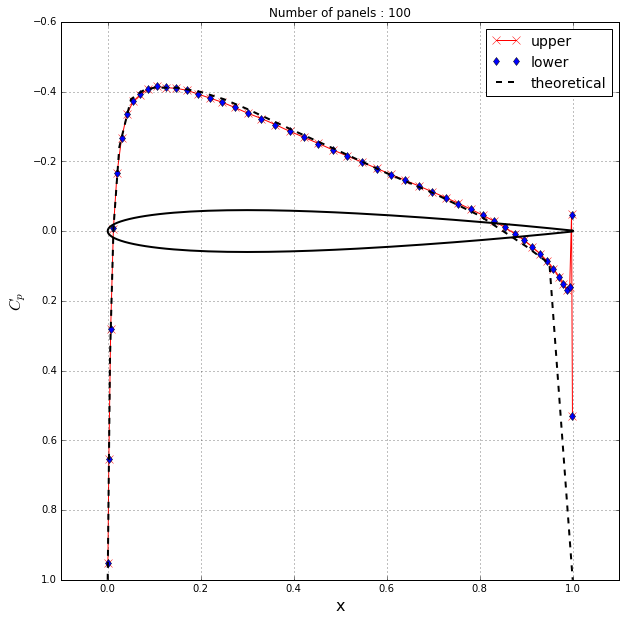

In [29]:
# plot the surface pressure coefficient
pyplot.figure(figsize=(10, 10))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('$C_p$', fontsize=16)
pyplot.plot([panel.xc for panel in panels if panel.loc == 'upper'],
            [panel.cp for panel in panels if panel.loc == 'upper'],
            label='upper',
            color='r', linewidth=1, marker='x', markersize=8)
pyplot.plot([panel.xc for panel in panels if panel.loc == 'lower'],
            [panel.cp for panel in panels if panel.loc == 'lower'],
            label='lower',
            color='b', linewidth=0, marker='d', markersize=6)
pyplot.plot(xtheo, 1-voverVsquared,
            label='theoretical',
            color='k', linestyle='--',linewidth=2)
pyplot.plot(x, y, color='k', linestyle='-', linewidth=2)
pyplot.legend(loc='best', prop={'size':14})
pyplot.xlim(-0.1, 1.1)
pyplot.ylim(1.0, -0.6)
pyplot.title('Number of panels : %d' % N);

### Accuracy check

In [30]:
# calculate the accuracy
accuracy = sum([panel.sigma*panel.length for panel in panels])
print('--> sum of source/sink strengths: {}'.format(accuracy))

--> sum of source/sink strengths: 0.0019211079214338162


### Plot the velocity field

In [31]:
def get_velocity_field(panels, freestream, X, Y):
    # freestream contribution
    u = freestream.u_inf * math.cos(freestream.alpha) * numpy.ones_like(X, dtype=float)
    v = freestream.u_inf * math.sin(freestream.alpha) * numpy.ones_like(X, dtype=float)
    # add the contribution from each source (superposition powers!!!)
    vec_intregral = numpy.vectorize(integral)
    for panel in panels:
        u += panel.sigma / (2.0 * math.pi) * vec_intregral(X, Y, panel, 1, 0)
        v += panel.sigma / (2.0 * math.pi) * vec_intregral(X, Y, panel, 0, 1)
    
    return u, v

In [32]:
# define a mesh grid
nx, ny = 20, 20  # number of points in the x and y directions
x_start, x_end = -1.0, 2.0
y_start, y_end = -0.3, 0.3
X, Y = numpy.meshgrid(numpy.linspace(x_start, x_end, nx),
                      numpy.linspace(y_start, y_end, ny))

# compute the velocity field on the mesh grid
u, v = get_velocity_field(panels, freestream, X, Y)

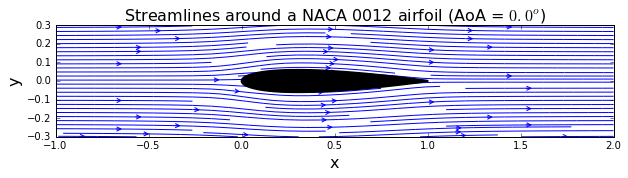

In [33]:
# plot the velocity field
width = 10
pyplot.figure(figsize=(width, width))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, Y, u, v,
                  density=1, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.fill([panel.xc for panel in panels],
            [panel.yc for panel in panels],
            color='k', linestyle='solid', linewidth=2, zorder=2)
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.title('Streamlines around a NACA 0012 airfoil (AoA = ${}^o$)'.format(alpha), fontsize=16);

### 4.2 Linear strength vortex simulation

In this part, we need to concern the effect caused by kutta condition and contribution from vortex, so, let‘s introduce the additional parts that 4.1 missed.then change the attack angle to 4°

In [34]:
# define and creates the object freestream
u_inf = 1.0                                # freestream spee
alpha1 = 4.0                                # angle of attack (in degrees)
freestream = Freestream(u_inf, alpha1)      # instantiation of the object freestream

In [35]:
def source_contribution_normal(panels):

    A = numpy.empty((panels.size, panels.size), dtype=float)
    # source contribution on a panel from itself
    numpy.fill_diagonal(A, 0.5)
    # source contribution on a panel from others
    for i, panel_i in enumerate(panels):
        for j, panel_j in enumerate(panels):
            if i != j:
                A[i, j] = 0.5/numpy.pi*integral(panel_i.xc, panel_i.yc, 
                                                panel_j,
                                                numpy.cos(panel_i.beta),
                                                numpy.sin(panel_i.beta))
    return A

In [36]:
def vortex_contribution_normal(panels):

    A = numpy.empty((panels.size, panels.size), dtype=float)
    # vortex contribution on a panel from itself
    numpy.fill_diagonal(A, 0.0)
    # vortex contribution on a panel from others
    for i, panel_i in enumerate(panels):
        for j, panel_j in enumerate(panels):
            if i != j:
                A[i, j] = -0.5/numpy.pi*integral(panel_i.xc, panel_i.yc, 
                                                 panel_j,
                                                 numpy.sin(panel_i.beta),
                                                 -numpy.cos(panel_i.beta))
    return A

In [37]:
A_source = source_contribution_normal(panels)
B_vortex = vortex_contribution_normal(panels)

In [38]:
def kutta_condition(A_source, B_vortex):

    b = numpy.empty(A_source.shape[0]+1, dtype=float)
    # matrix of source contribution on tangential velocity
    # is the same than
    # matrix of vortex contribution on normal velocity
    b[:-1] = B_vortex[0, :] + B_vortex[-1, :]
    # matrix of vortex contribution on tangential velocity
    # is the opposite of
    # matrix of source contribution on normal velocity
    b[-1] = - numpy.sum(A_source[0, :] + A_source[-1, :])
    return b

In [39]:
def build_singularity_matrix(A_source, B_vortex):

    A = numpy.empty((A_source.shape[0]+1, A_source.shape[1]+1), dtype=float)
    # source contribution matrix
    A[:-1, :-1] = A_source
    # vortex contribution array
    A[:-1, -1] = numpy.sum(B_vortex, axis=1)
    # Kutta condition array
    A[-1, :] = kutta_condition(A_source, B_vortex)
    return A

In [40]:
def build_freestream_rhs(panels, freestream):

    b = numpy.empty(panels.size+1,dtype=float)
    # freestream contribution on each panel
    for i, panel in enumerate(panels):
        b[i] = -freestream.u_inf * numpy.cos(freestream.alpha - panel.beta)
    # freestream contribution on the Kutta condition
    b[-1] = -freestream.u_inf*( numpy.sin(freestream.alpha-panels[0].beta)
                               +numpy.sin(freestream.alpha-panels[-1].beta) )
    return b

In [41]:
A1 = build_singularity_matrix(A_source, B_vortex)
b1 = build_freestream_rhs(panels, freestream)

In [42]:
# solve for singularity strengths
strengths1 = numpy.linalg.solve(A1, b1)

# store source strength on each panel
for i , panel in enumerate(panels):
    panel.sigma = strengths1[i]
    
# store circulation density
gamma = strengths1[-1]

In [43]:
def compute_tangential_velocity(panels, freestream, gamma, A_source, B_vortex):

    A = numpy.empty((panels.size, panels.size+1), dtype=float)
    # matrix of source contribution on tangential velocity
    # is the same than
    # matrix of vortex contribution on normal velocity
    A[:, :-1] = B_vortex
    # matrix of vortex contribution on tangential velocity
    # is the opposite of
    # matrix of source contribution on normal velocity
    A[:, -1] = -numpy.sum(A_source, axis=1)
    # freestream contribution
    b = freestream.u_inf*numpy.sin([freestream.alpha-panel.beta 
                                    for panel in panels])
    
    strengths = numpy.append([panel.sigma for panel in panels], gamma)
    
    tangential_velocities = numpy.dot(A, strengths) + b
    
    for i, panel in enumerate(panels):
        panel.vt = tangential_velocities[i]

In [44]:
# tangential velocity at each panel center.
compute_tangential_velocity(panels, freestream, gamma, A_source, B_vortex)

In [45]:
def compute_pressure_coefficient(panels, freestream):
    
    for panel in panels:
        panel.cp = 1.0 - (panel.vt/freestream.u_inf)**2

In [46]:
compute_pressure_coefficient(panels, freestream)

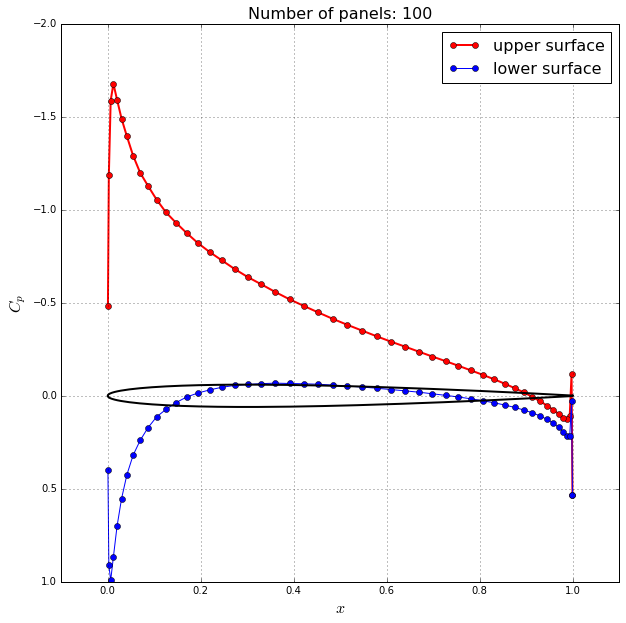

In [47]:
# plot surface pressure coefficient
pyplot.figure(figsize=(10, 10))
pyplot.grid()
pyplot.xlabel('$x$', fontsize=16)
pyplot.ylabel('$C_p$', fontsize=16)
pyplot.plot([panel.xc for panel in panels if panel.loc == 'upper'],
            [panel.cp for panel in panels if panel.loc == 'upper'],
            label='upper surface',
            color='r', linestyle='-', linewidth=2, marker='o', markersize=6)
pyplot.plot([panel.xc for panel in panels if panel.loc == 'lower'],
            [panel.cp for panel in panels if panel.loc == 'lower'],
            label= 'lower surface',
            color='b', linestyle='-', linewidth=1, marker='o', markersize=6)
pyplot.plot(x, y, color='k', linestyle='-', linewidth=2)
pyplot.legend(loc='best', prop={'size':16})
pyplot.xlim(-0.1, 1.1)
pyplot.ylim(1.0, -2.0)
pyplot.title('Number of panels: {}'.format(panels.size), fontsize=16);

In [48]:
# calculate the accuracy
accuracy = sum([panel.sigma*panel.length for panel in panels])
print('sum of singularity strengths: {:0.6f}'.format(accuracy))

sum of singularity strengths: 0.001607


### Plot the velocity field

The velocity field code is same as we did the challenge task in lesson 11.

In [49]:
def get_velocity_field(panels, freestream, X, Y):

    # freestream contribution
    u = freestream.u_inf * math.cos(freestream.alpha) * numpy.ones_like(X, dtype=float)
    v = freestream.u_inf * math.sin(freestream.alpha) * numpy.ones_like(X, dtype=float)
    # add the contribution from each source (superposition powers!!!)
    vec_intregral = numpy.vectorize(integral)
    #vec_intregral1 = numpy.vectorize(integral1)
    for panel in panels:
        u += panel.sigma / (2.0 * math.pi) * vec_intregral(X, Y, panel, 1, 0)+gamma / (2.0 * math.pi) * vec_intregral(X, Y, panel, 1, 0)
        v += panel.sigma / (2.0 * math.pi) * vec_intregral(X, Y, panel, 0, 1)+gamma / (2.0 * math.pi) * vec_intregral(X, Y, panel, 0, 1)

    return u, v

In [50]:
u, v = get_velocity_field(panels, freestream, X, Y)

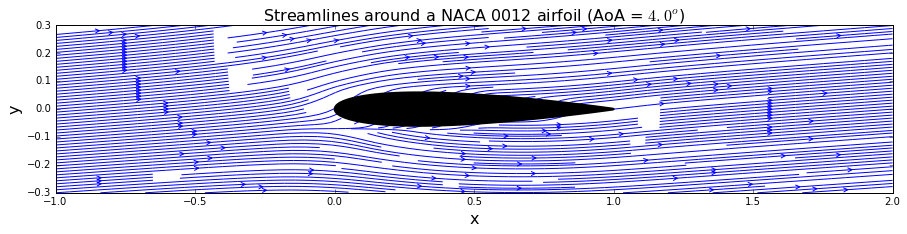

In [51]:
# plot the velocity field
width = 15
pyplot.figure(figsize=(width, width))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.fill([panel.xc for panel in panels],
            [panel.yc for panel in panels],
            color='k', linestyle='solid', linewidth=2, zorder=2)
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.title('Streamlines around a NACA 0012 airfoil (AoA = ${}^o$)'.format(alpha1), fontsize=16);

### 4.2 Linear strength doublet simulation

Creat a def integrand of doublet is a little different than source and vortex, because the velocity of u and v are not having similar form derived from Φ. Thus, we need to create a new different integrand.

def integral_doublet(x, y, panel, dxdz, dydz):
    def integrand(s):
        return ((s+1)*((2*((x - (panel.xa - math.sin(panel.beta)*s))*dxdz
                  *(y - (panel.ya + math.cos(panel.beta)*s))*dydz))-((x - (panel.xa - math.sin(panel.beta)*s))*dxdz
                  -(y - (panel.ya + math.cos(panel.beta)*s))*dydz))
                / (((x - (panel.xa - math.sin(panel.beta)*s))**2
                   +(y - (panel.ya + math.cos(panel.beta)*s))**2)**2) )
    return integrate.quad(integrand, 0.0, panel.length)[0]

In [60]:
def integral_doublet(x, y, panel, dxdz, dydz):
    def integrand(s):
        return ((s+1)*(-((x - (panel.xa - math.sin(panel.beta)*s))*dxdz
                  -(y - (panel.ya + math.cos(panel.beta)*s))*dydz)+(2*((x - (panel.xa - math.sin(panel.beta)*s))*dxdz
                  *(y - (panel.ya + math.cos(panel.beta)*s))*dydz)))
                / (((x - (panel.xa - math.sin(panel.beta)*s))**2
                   +(y - (panel.ya + math.cos(panel.beta)*s))**2)**2) )
    return integrate.quad(integrand, 0.0, panel.length)[0]

And also, according to Joseph Katz, when we use doublet strength, the kutta condition should be considered. and the distribution of pressure coefficient is also similar as using vortex strength.

In [61]:
# define and creates the object freestream
u_inf = 1.0                                # freestream spee
alpha2 = 0.0                                # angle of attack (in degrees)
freestream = Freestream(u_inf, alpha2)      # instantiation of the object freestream

### Conclution

1. When I use N=40 which is not shown in the coding above, the accuracy check indicated the sum of source/sink strengths is 0.005646279901798853, it is even higher than the result when using only constant strength (the sum of source/sink strengths is 0.00461703117528311). Therefore, In this case, adding the linear strength source is not that helpful as my thought. and some how, at the end of the airfoil, the point on the trailing edge has unusual active, the reason is unknown.

2. The same thing happened after introducing the contribution from the vortex, the accuracy check did not show a better result. and the problem is same as in 4.1 part

3. With the panels number increasing, the result of sum of source/sink strengths is reduced, which indicated that "more panels, more accurate."

In one word, using linear strength panel method, in this case with my coding skill, is not that better than using constant strength panel method, additional, introducing linear strength panel method brought more steps into calculation process which reduce the calculation speed. However, there may have some bugs that I can not figure out and lead to low accuracy in my project. Therefore, we still can not ignore the effect of linear strength panel method while doing similar process.

## References

Katz, J., & Plotkin, A. (2001). Low-speed aerodynamics (Vol. 13). Cambridge university press.

http://www2.esm.vt.edu/~dtmook/AOE5104_ONLINE/Class%20Notes/18_Class_PanelMethods.pdf